In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df=pd.read_csv('DS_salary_cleaned.csv')

In [129]:
df['Job Title'].value_counts()

Data Scientist                                                                                   835
Data Engineer                                                                                    117
Senior Data Scientist                                                                            115
Senior Data Engineer                                                                              31
Principal Data Scientist                                                                          17
Lead Data Scientist                                                                               15
Data Developer (Future Opportunities)                                                             14
Associate Scientist, LCMS                                                                         14
Senior/Principal Scientist, Protein Sciences                                                      13
Sr Principal Data Scientist                                                                

In [130]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'City', 'State', 'Country', 'At_hq',
       'Company_age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'Hadoop',
       'Tableau', 'Power_bi', 'BI', 'Min_revenue', 'Max_revenue',
       'Average_revenue'],
      dtype='object')

Return the job position title

In [131]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [132]:
df['Job Simplified']=df['Job Title'].apply(title_simplifier)

Specify if it's an entry level position or not

In [133]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [134]:
df['Job Senioriry']=df['Job Description'].apply(seniority)

Job description length

In [135]:
df['Desc Length']=df['Job Description'].apply(lambda x : len(x))

Number of Competitors

In [136]:
df['Competitors Length']=df['Competitors'].apply(lambda x:len(x.split(',')) if x !='-1' else 0) 

Take out the \n at the end of companies names

In [137]:
df['Company Name']=df['Company Name'].apply(lambda x:x.replace('\n',''))

# EDA

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 38 columns):
Company Name          2000 non-null object
Competitors           2000 non-null object
Founded               2000 non-null int64
Headquarters          2000 non-null object
Industry              2000 non-null object
Job Description       2000 non-null object
Job Title             2000 non-null object
Location              2000 non-null object
Rating                2000 non-null float64
Revenue               2000 non-null object
Salary Estimate       2000 non-null object
Sector                2000 non-null object
Size                  2000 non-null object
Type of ownership     2000 non-null object
min_salary            2000 non-null int64
max_salary            2000 non-null int64
avg_salary            2000 non-null float64
City                  2000 non-null object
State                 2000 non-null object
Country               2000 non-null object
At_hq                 2000 non-nul

In [142]:
df[['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI']]=df[['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI']].astype('object') 

In [144]:
numerical_cols=df.select_dtypes(exclude='object')

categorical_cols=df.select_dtypes(include='object')

In [145]:
numerical_cols.describe()

,Founded,Rating,min_salary,max_salary,avg_salary,Company_age,Min_revenue,Max_revenue,Average_revenue,Desc Length,Competitors Length
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1679.432000,3.537400,81.33700,111.820000,96.578500,30.344500,1340.362000,1698.909500,1519.635750,3615.448500,0.720000
std,716.684585,1.259919,25.19162,26.778913,25.116832,38.533093,3085.853188,3368.311236,3194.491176,1683.068872,1.224479
min,-1.000000,-1.000000,31.00000,59.000000,47.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
25%,1939.000000,3.300000,61.00000,98.000000,79.500000,6.000000,0.000000,0.000000,0.000000,2508.000000,0.000000
50%,1996.000000,3.700000,83.00000,101.000000,92.000000,15.000000,25.000000,25.000000,22.500000,3430.500000,0.000000
75%,2008.000000,4.200000,99.00000,129.000000,116.500000,39.000000,500.000000,1000.000000,750.000000,4555.000000,2.000000
max,2020.000000,5.000000,145.00000,182.000000,163.500000,276.000000,10000.000000,10000.000000,10000.000000,10678.000000,4.000000


In [146]:
categorical_cols.describe()

,Company Name,Competitors,Headquarters,Industry,Job Description,Job Title,Location,Revenue,Salary Estimate,Sector,...,R,Spark,AWS,Excel,Hadoop,Tableau,Power_bi,BI,Job Simplified,Job Senioriry
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,541,150,269,58,616,200,241,14,37,25,...,2,2,2,2,2,2,2,2,7,3
top,Q2 Solutions,-1,"New York, NY",Biotech & Pharmaceuticals,Q2 Solutions is a leading clinical trial labor...,Data Scientist,"New York, NY",Unknown / Non-Applicable,$83K-$101K (Glassdoor est.),Information Technology,...,0,0,0,0,0,0,0,0,data scientist,senior
freq,56,1458,115,291,14,835,122,646,275,558,...,1744,1454,1515,1915,1561,1659,1908,1911,1257,1424


### Numerical variables


In [147]:
numerical_cols.columns

Index(['Founded', 'Rating', 'min_salary', 'max_salary', 'avg_salary',
       'Company_age', 'Min_revenue', 'Max_revenue', 'Average_revenue',
       'Desc Length', 'Competitors Length'],
      dtype='object')

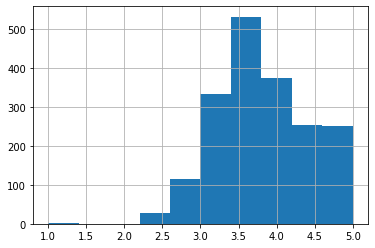

In [72]:
df[df['Rating']>=0]['Rating'].hist()
plt.show()

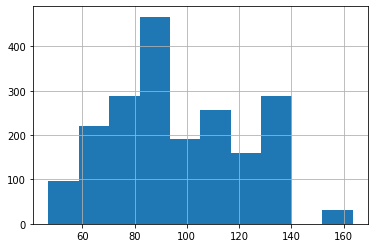

In [74]:
df['avg_salary'].hist()


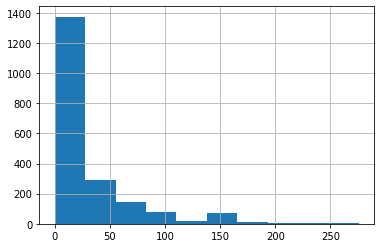

In [79]:
df['Company_age'].hist()


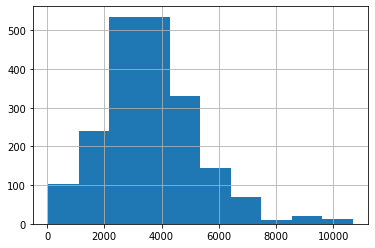

In [80]:
df['Desc Length'].hist()


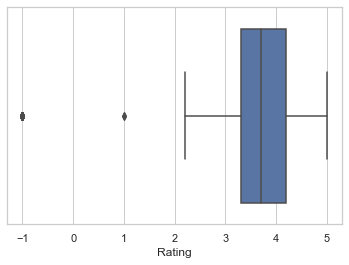

In [88]:
#sns.set(style="whitegrid")
sns.boxplot(x=df["Rating"])

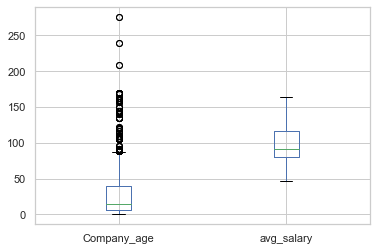

In [89]:
df.boxplot(column=['Company_age','avg_salary'])

In [117]:
corr=df[['Company_age','avg_salary','Rating','Desc Length','Competitors Length']].corr()

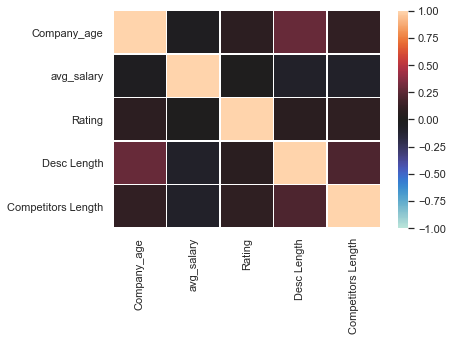

In [118]:
sns.heatmap(corr,vmax=1,vmin=-1,center=0,linewidths=.5)

### Categorical variables


In [148]:
cat=list(categorical_cols.columns)
cat

['Company Name',
 'Competitors',
 'Headquarters',
 'Industry',
 'Job Description',
 'Job Title',
 'Location',
 'Revenue',
 'Salary Estimate',
 'Sector',
 'Size',
 'Type of ownership',
 'City',
 'State',
 'Country',
 'At_hq',
 'Python',
 'R',
 'Spark',
 'AWS',
 'Excel',
 'Hadoop',
 'Tableau',
 'Power_bi',
 'BI',
 'Job Simplified',
 'Job Senioriry']

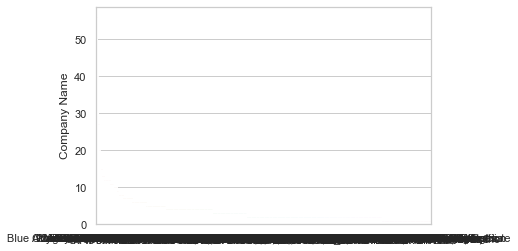

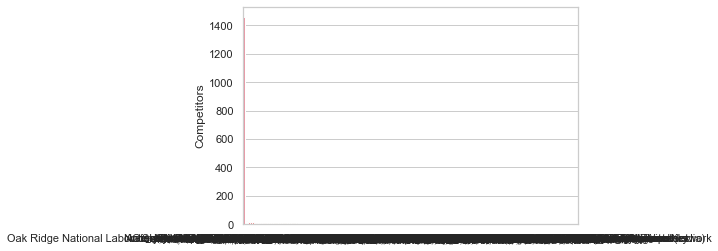

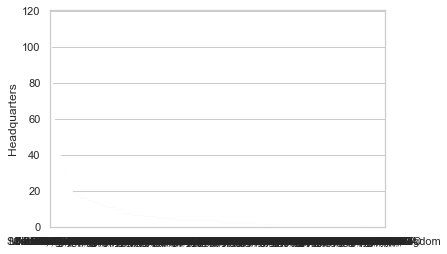

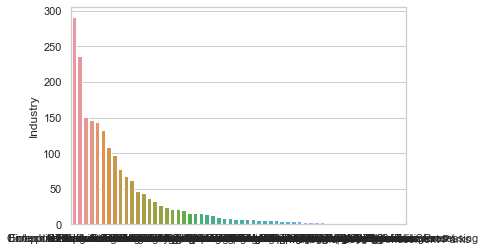

/home/mahmoud/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8239 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mahmoud/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8208 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [ ]:
for i in categorical_cols.columns:
    cat_num=categorical_cols[i].value_counts()
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.show()